# 🦙 **Using the Text Generation Inference (TGI) with Llama Models**

In this notebook, we'll explore how simple it is to serve and consume the **[Llama models](https://huggingface.co/blog/llama32)** using the **Text Generation Inference (TGI)** project. 🚀

## 🗂 **Available Llama Models**

You can browse the entire collection of Llama models in [this link](https://huggingface.co/collections/meta-llama/llama-32-66f448ffc8c32f949b04c8cf).

## 📚 **Learn More About TGI**

To explore the technical details behind the **Text Generation Inference** project, visit the [official GitHub repository](https://github.com/huggingface/text-generation-inference). 💡



# 🍽️ **Serving the Llama Model**

Now that we've seen the available models, it's time to **serve** one using the **Text Generation Inference (TGI)** framework! 🛠️

With TGI, you can deploy Llama models efficiently to handle text generation requests. Whether you're hosting it on your local machine, or deploying it on the cloud, the process is streamlined for performance and scalability.


## 🐳 **Using Docker**

Check out the Docker setup guide in the official TGI repository [here](https://github.com/huggingface/text-generation-inference?tab=readme-ov-file#docker).



In [ ]:
'''
model=meta-llama/Llama-3.2-1B # replace with the model of your choice
# share a volume with the Docker container to avoid downloading weights every run
volume=$PWD/data
token=<HF_TOKEN>

docker run --gpus all --shm-size 1g -p 8080:80 -v $volume:/data -e HF_TOKEN=$token \
  ghcr.io/huggingface/text-generation-inference:2.3.0 --model-id $model --quantize bitsandbytes
'''

We can call the model using CURL:

In [ ]:
'''
curl 127.0.0.1:8080/generate_stream \
  -X POST  \
  -d '{"inputs":"What is Deep Learning?","parameters":{"max_new_tokens":20}}'  \
  -H 'Content-Type: application/json'
'''

## 🌐 **Using Inference Endpoints**

Another efficient way to serve Llama models is by using **Inference Endpoints** on Hugging Face. 🚀 This allows you to deploy models in a fully managed environment with just a few clicks.

For detailed instructions on how to set up and use Inference Endpoints, refer to the [official documentation](https://huggingface.co/docs/inference-endpoints/index). You'll find everything you need to start serving your models in a reliable and scalable way! 💡

![HG enfpoints creationg flow](https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/creation_flow.png)


# 🍽️ **Consuming the Model**

Once the Llama model is up and running, you can start interacting with it using a simple API.

To consume the model, you'll send a request to the API endpoint and receive a response with the generated text. Hugging Face provides an easy-to-use interface for this, making it accessible from any application.

You can refer to the [API Inference Notebook](https://github.com/huggingface/huggingface-llama-recipes/blob/main/api_inference/inference-api.ipynb) for a step-by-step guide on how to send requests to the model and retrieve responses 🦙✨.


## 🌐 **Using CURL**

You can interact with the 🦙 Llama models using CURL. Below are examples of how to use CURL for both standard text generation and chat completions.



**NOTE**:
* **Authorization Token**: Replace `<Token>` with your actual Hugging Face API token.
* **URL**: We are using the free deployed endpoints provided by Hugging Face as an example. When using **Inference Endpoints**, we would need to update the  accordingly.


### 1. **Text Generation**

To generate text using the Llama model, you can send a POST request like this:

In [9]:
# change the URL if needed
!curl https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-11B-Vision-Instruct -X POST \
    -d '{"inputs":"What is Deep Learning?","parameters":{"max_new_tokens":20}}' \
    -H 'Content-Type: application/json'\
    -H "Authorization: Bearer <Token>"

[{"generated_text":" A Beginner’s Guide\nDeep learning is a subset of machine learning that involves the use of artificial neural"}]

### 2. **Chat Completions**

For chat interactions, you can use a similar approach to send messages:

In [8]:
# change the URL if needed
!curl https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-11B-Vision-Instruct/v1/chat/completions -X POST \
    -d '{ \
    "messages": [ \
    {"role": "system", "content": "You are a helpful assistant."}, \
    {"role": "user", "content": "What is deep learning?"} \
    ], \
    "stream": true, \
    "max_tokens": 20 \
    }' \
    -H 'Content-Type: application/json' \
    -H "Authorization: Bearer <Token>"

data: {"object":"chat.completion.chunk","id":"","created":1727856277,"model":"meta-llama/Llama-3.2-11B-Vision-Instruct","system_fingerprint":"2.3.1-dev0-sha-de90261","choices":[{"index":0,"delta":{"role":"assistant","content":"Deep"},"logprobs":null,"finish_reason":null}],"usage":null}

data: {"object":"chat.completion.chunk","id":"","created":1727856277,"model":"meta-llama/Llama-3.2-11B-Vision-Instruct","system_fingerprint":"2.3.1-dev0-sha-de90261","choices":[{"index":0,"delta":{"role":"assistant","content":" learning"},"logprobs":null,"finish_reason":null}],"usage":null}

data: {"object":"chat.completion.chunk","id":"","created":1727856277,"model":"meta-llama/Llama-3.2-11B-Vision-Instruct","system_fingerprint":"2.3.1-dev0-sha-de90261","choices":[{"index":0,"delta":{"role":"assistant","content":" is"},"logprobs":null,"finish_reason":null}],"usage":null}

data: {"object":"chat.completion.chunk","id":"","created":1727856277,"model":"meta-llama/Llama-3.2-11B-Vision-Instruct","system_fing

## 🐍 **Using Python**

We can also manage these requests using Python as follows. For mode details about the parameters, refer to the [docs](https://huggingface.co/docs/api-inference/parameters).

In [ ]:
import requests

API_URL = "https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-11B-Vision-Instruct" # change the URL if needed
headers = {
    "Authorization": "Bearer <token>",
    "Content-Type": "application/json",
    "x-use-cache": "false"
}
data = {
    "inputs": "What is Deep Learning?"
}
response = requests.post(API_URL, headers=headers, json=data)
print(response.json())

[{'generated_text': " [7 models explained]\nPosted by: techsaiyan in Machine Learning June 2, 2019\nDeep Learning is a branch of artificial intelligence that ensues the development of a computer's potential to interpret, research, and understand complex data like photos, audio, and texts. The ultimate objective of deep learning frameworks is to influence machines to examine, process raw data and extract valuable information from the data. Deep learning exists within machine learning and all ensues the development of a computer's potential"}]


In [ ]:
import requests

API_URL = "https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-11B-Vision-Instruct/v1/chat/completions" # change the URL if needed
headers = {
    "Authorization": "Bearer <token>",
    "Content-Type": "application/json",
    "x-use-cache": "false"
}

data = {
    "messages":  [
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
            "role": "user",
            "content": "What is deep learning?"
        }
    ]
}

response = requests.post(API_URL, headers=headers, json=data)
print(response.json())

{'object': 'chat.completion', 'id': '', 'created': 1727812546, 'model': 'meta-llama/Llama-3.2-11B-Vision-Instruct', 'system_fingerprint': '2.3.1-dev0-sha-de90261', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'Deep learning is a subfield of machine learning that involves the use of artificial neural networks (ANNs) with multiple layers to learn and represent data. The main idea behind deep learning is to create models that can learn complex patterns and features from large amounts of data by mimicking the structure and function of the human brain.\n\nIn traditional machine learning, models are designed to recognize and classify patterns using hand-engineered features. However, deep learning models learn these features automatically from the data, which allows them to'}, 'logprobs': None, 'finish_reason': 'length'}], 'usage': {'prompt_tokens': 47, 'completion_tokens': 100, 'total_tokens': 147}}


## 🐍 **Using huggingface_hub's Inference Client Python API**

To interact with the Llama models programmatically, you can also utilize the **[huggingface_hub's Inference Client](https://huggingface.co/docs/huggingface_hub/guides/inference)**.



In [ ]:
!pip install huggingface_hub

This models are gated so we need to authenticate first

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

### ✍️ **Text Generation**

Using the Hugging Face Hub, you can easily perform text generation with the Llama models. Below is an example of how to utilize the `InferenceClient` to generate text based on a given prompt. 🚀

Again, we are using the free endpoints provided by Hugging Face. In the case of using an **Inference Endpoint** we would need to update the call

For info, you can check out the parameters in [InferenceClient](https://huggingface.co/docs/huggingface_hub/v0.25.1/en/package_reference/inference_client#huggingface_hub.InferenceClient) and the [TGI Messages API](https://huggingface.co/docs/text-generation-inference/en/messages_api).


In [26]:
from huggingface_hub import InferenceClient

client = InferenceClient(model="meta-llama/Llama-3.2-3B")
#client = InferenceClient(base_model="<URL>")

response = client.text_generation(
    prompt="A HTTP POST request is used to ",
    temperature=0.8,
    max_new_tokens=50,
    seed=42,
    return_full_text=True,
)
print(response)

A HTTP POST request is used to  submit  a form.  
When a  form is submitted, the data is taken from the form elements.  
In your form, you must have a name and a value for each element.  
Submit button in form  
Name=hidden1  



### 💬 **Chat Example**

The Llama models can also be utilized for chat-like interactions. With the `InferenceClient`, you can easily create conversational AI experiences. Below is an example of how to generate a chat response based on user input. 🗣️


In [ ]:
client = InferenceClient(model="meta-llama/Llama-3.2-11B-Vision-Instruct")
#client = InferenceClient(base_model="<URL>")

output = client.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Count to 10"},
    ],
    stream=True,
    max_tokens=1024,
)

for chunk in output:
    print(chunk.choices[0].delta.content)

1
,
 
2
,
 
3
,
 
4
,
 
5
,
 
6
,
 
7
,
 
8
,
 
9
,
 
10
.



### 🖼️ **Chat with Image**

The Llama models also support multimodal interactions, allowing you to send images along with text prompts. This feature enables the model to analyze images and respond accordingly. Below is an example of how to engage in a chat with an image input. 📸


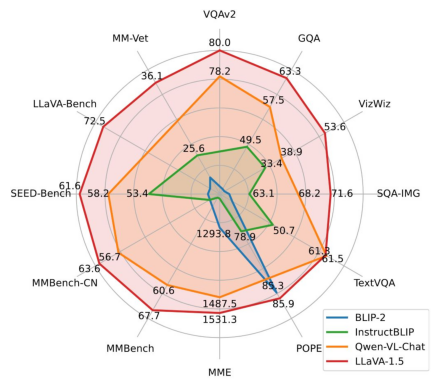

In [17]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://raw.githubusercontent.com/haotian-liu/LLaVA/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
client = InferenceClient(model="meta-llama/Llama-3.2-11B-Vision-Instruct")
#client = InferenceClient(base_model="<URL>")

output = client.chat.completions.create(
    messages=[
      {
        "role": "user",
        "content": [
          {"type": "text", "text": "What’s in this image?"},
          {
            "type": "image_url",
            "image_url": {
              "url": "https://raw.githubusercontent.com/haotian-liu/LLaVA/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg",
            },
          },
        ],
      }
    ],
    stream=True,
    max_tokens=200,
)

full_response = []
for chunk in output:
    full_response.append(chunk.choices[0].delta.content)

final_text = ''.join(full_response)
print(final_text)

The image includes a line graph featuring various key points across the middle of the circle/square, showing score results. Five out of the 13 points, are labeled in geographically named areas: SEED-Bench, MM-Bench, VMEA, SQA-IMG and MMBench-CN. The top of the graph says VQAv2.

The board consists of a red, orange, green, and blue hexagon shapes. They appear similar together with light shading, and blending as the top edge approaches the curved panel. The standards listed within the graph labels are: VizWiz, GQA, POPE, MME, and TextVQA as examples. 

Meaning isn't strongly indicated, but could include comparisons in various AI technology performance with different aspects of testing latency. One segment could be common performability to a test while another has low latency that is significantly quicker to complete.


### 📸 **Chat with an Image in Base64 Format**

You can also send images encoded in Base64 format to the Llama models, enabling multimodal interactions without relying on image URLs. This approach can be useful when you want to embed images directly in your requests. Below is an example of how to use Base64 encoding for image inputs in a chat. 🌟


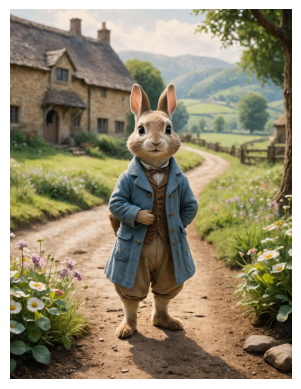

In [18]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import base64
import requests
from PIL import Image
from io import BytesIO

url = 'https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg'

image = Image.open(requests.get(url, stream=True).raw)

def encode_image(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

base64_image = encode_image(image)

output = client.chat.completions.create(
    messages=[
      {
        "role": "user",
        "content": [
          {"type": "text", "text": "What’s in this image?"},
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            },
          },
        ],
      }
    ],
    stream=True,
    max_tokens=200,
)

full_response = []
for chunk in output:
    full_response.append(chunk.choices[0].delta.content)

final_text = ''.join(full_response)
print(final_text)

The image depict a rabbit in clothing.
